In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
# set figure size and figure format 

plt.rcParams['figure.figsize'] = [8, 6]
%config InlineBackend.figure_format = 'svg'

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv('data/prosperLoanData.csv')

In [5]:
df.head(6)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
df.shape

(113937, 81)

In [7]:
base_color = sns.color_palette()[0]

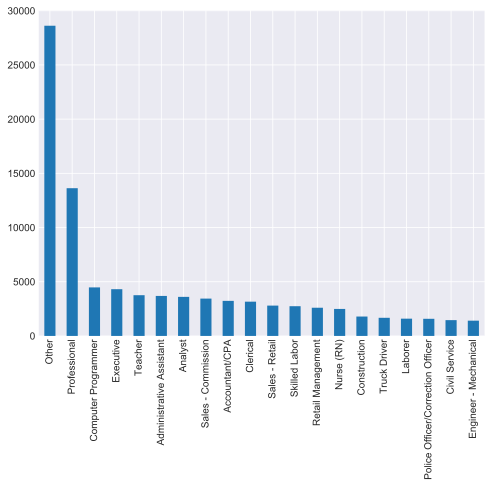

In [8]:
df.Occupation.value_counts().head(20).plot(kind = 'bar', color = base_color);

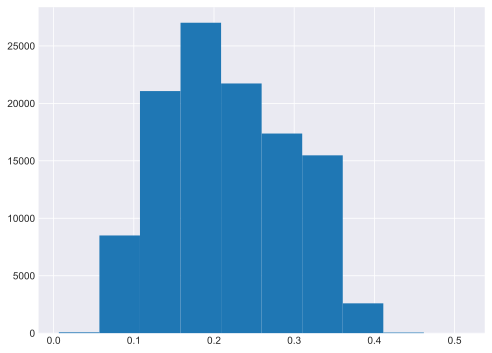

In [9]:
df.BorrowerAPR.hist();

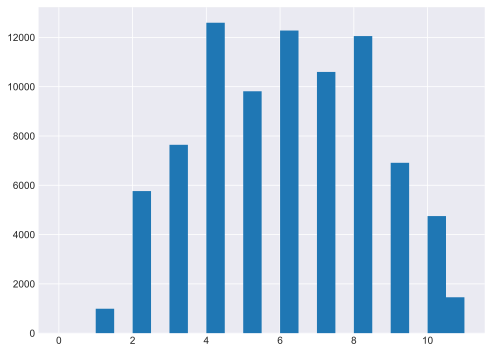

In [10]:
bins = np.arange(0, df['ProsperScore'].max()+.5, .5)
plt.hist(data = df, x = 'ProsperScore', bins = bins);

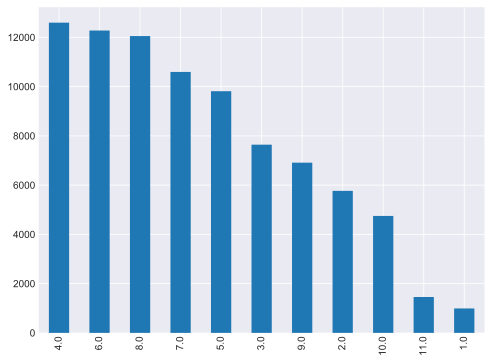

In [11]:
base_color = sns.color_palette()[0]
df['ProsperScore'].value_counts().plot(kind = 'bar', color = base_color)

In [12]:
prosperscore = df['ProsperScore'].dropna()

In [13]:
level_order = ['1.0','2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0']
order_cat = pd.api.types.CategoricalDtype(ordered = True, categories=level_order)
prosperscore = prosperscore.astype(order_cat)

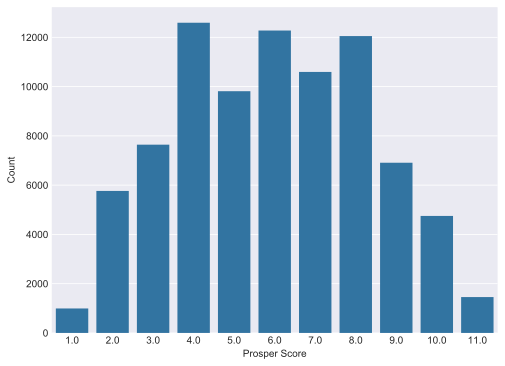

In [14]:
# color = '#099DD9' can be use , good one
# color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']
# prosper score count plot
#base_color = sns.color_palette()[9]
# 'darkturquoise'
sns.countplot(data = df, x = 'ProsperScore', color = base_color);
plt.xticks(rotation = 0)
plt.xlabel('Prosper Score')
# plt.style.use()
plt.ylabel('Count');

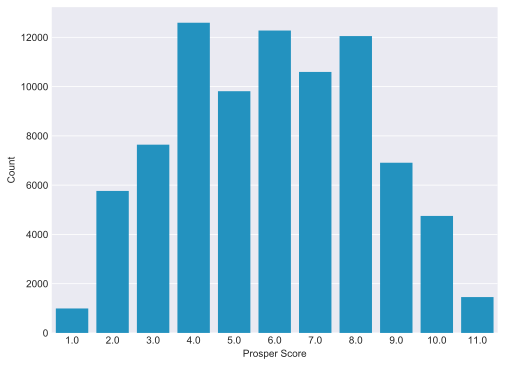

In [15]:
# color = '#099DD9' can be use , good one

# prosper score count plot
#base_color = sns.color_palette()[]
sns.countplot(data = df, x = 'ProsperScore', color = '#099DD9' );
plt.xticks(rotation = 0)
plt.xlabel('Prosper Score')
plt.ylabel('Count');

In [16]:

df['BorrowerRate'] =df['BorrowerRate'].apply(lambda x: x *100)

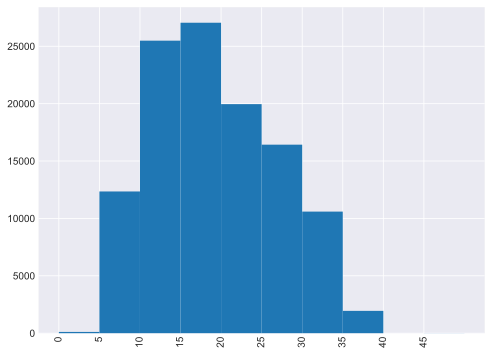

In [17]:
# Borrower Rate

ticks =np.arange(0, 50 ,5)
labels = ['{}'.format(v) for v in ticks]
bins = np.arange(0, df['BorrowerRate'].max()+5, 5)
plt.hist(data = df, x = 'BorrowerRate', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90);


In [18]:
df['BorrowerRate'].describe()

count    113937.000000
mean         19.276406
std           7.481843
min           0.000000
25%          13.400000
50%          18.400000
75%          25.000000
max          49.750000
Name: BorrowerRate, dtype: float64

In [19]:
df['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

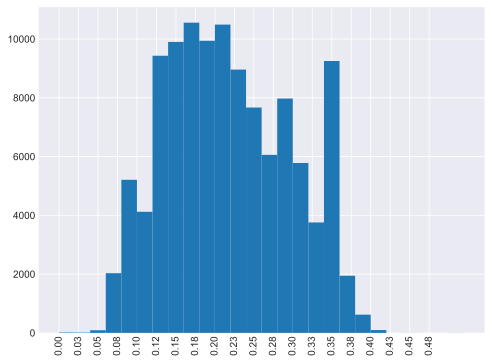

In [20]:
# Borrower Rate
ticks =list(np.arange(0, 0.5, 0.025))
labels = ['{:.2f}'.format(v) for v in ticks]
bins = np.arange(0, df['BorrowerAPR'].max()+.02, .02)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90); 

In [21]:
occ = df['Occupation'].value_counts().head(10)

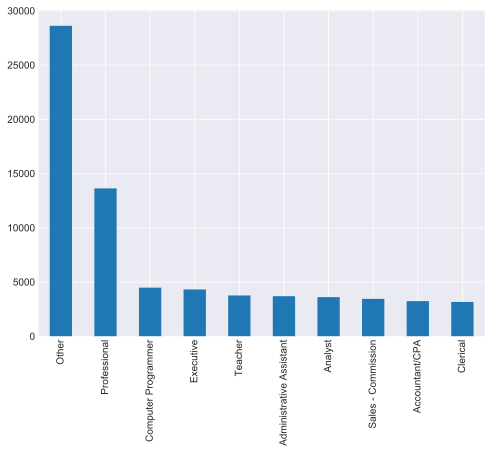

In [22]:
occ.plot(kind = 'bar', color = base_color);

In [23]:
type_order = df['EmploymentStatus'].value_counts().index

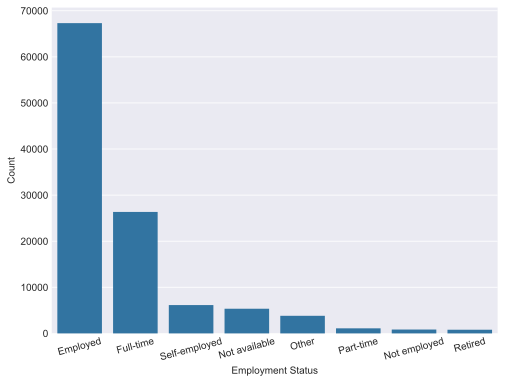

In [24]:
sns.countplot(data = df, x = 'EmploymentStatus', color = base_color, order=type_order);
plt.xticks(rotation = 15);
plt.xlabel('Employment Status')
plt.ylabel('Count');

In [25]:
df['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

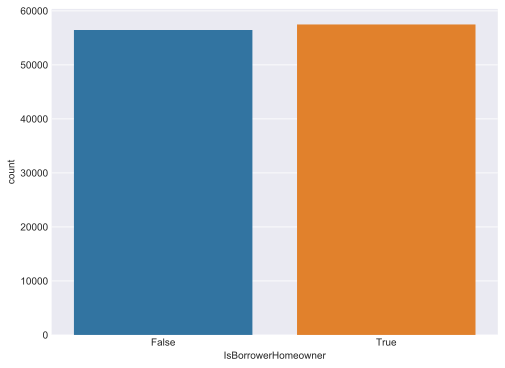

In [26]:
# is borrower home owner
sns.countplot( data = df, x = 'IsBorrowerHomeowner');

In [27]:
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [28]:
type_order_income = df['IncomeRange'].value_counts().index

Text(0, 0.5, 'Income Range')

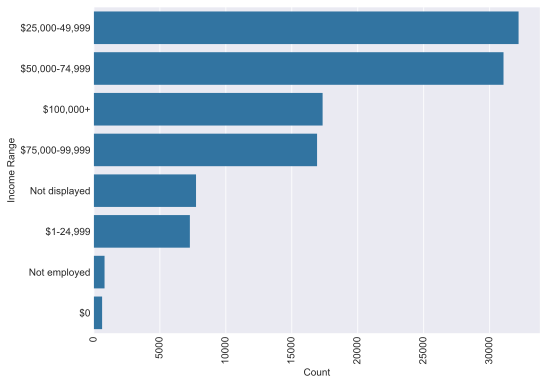

In [29]:
sns.countplot(data = df, y = 'IncomeRange', color = base_color, order  = type_order_income)
plt.xticks(rotation = 90);
plt.xlabel('Count')
plt.ylabel('Income Range')

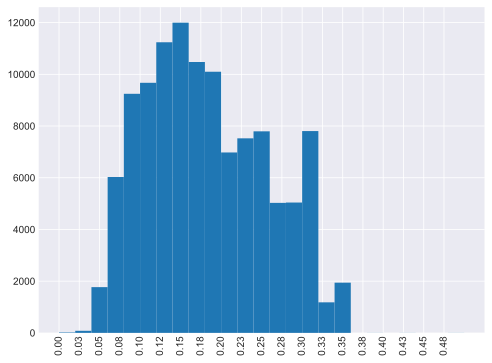

In [30]:
# lender yield

ticks =list(np.arange(0, 0.5, 0.025))
labels = ['{:.2f}'.format(v) for v in ticks]
bins = np.arange(0, df['LenderYield'].max()+.02, .02)
plt.hist(data = df, x = 'LenderYield', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90); 

In [31]:
# total inquery
order_type_inq = df['TotalInquiries'].value_counts().head(20).index

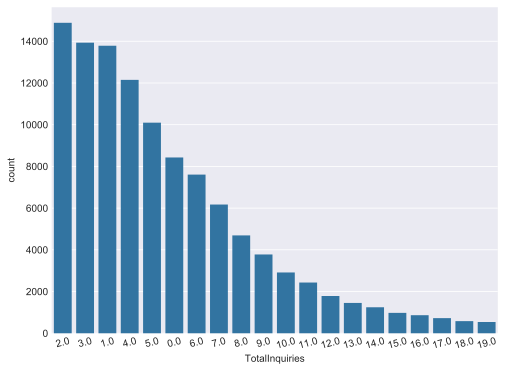

In [32]:
# use order type for highest to lowest
plt.figure(figsize=(8,6))
sns.countplot(data =df, x = 'TotalInquiries', order = order_type_inq, color=base_color);
plt.xticks(rotation = 15);

(-1, 20.5)

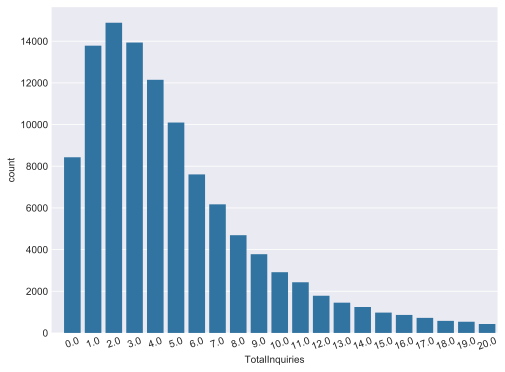

In [33]:
# no order type, use x limit to take only first 20 value, 

plt.figure(figsize=(8,6))
sns.countplot(data =df, x = 'TotalInquiries', color= base_color);
plt.xticks(rotation = 20);
plt.xlim((-1,20.5))



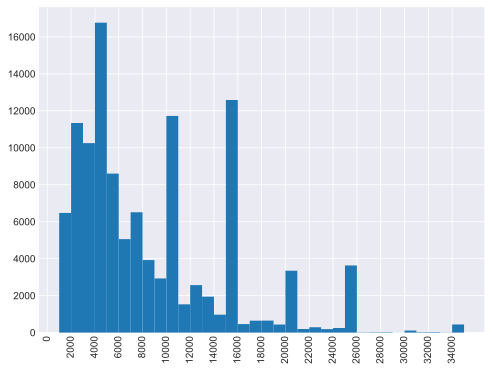

In [68]:
ticks =np.arange(0, 36000 ,2000)
labels = ['{}'.format(v) for v in ticks]
bins = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90);

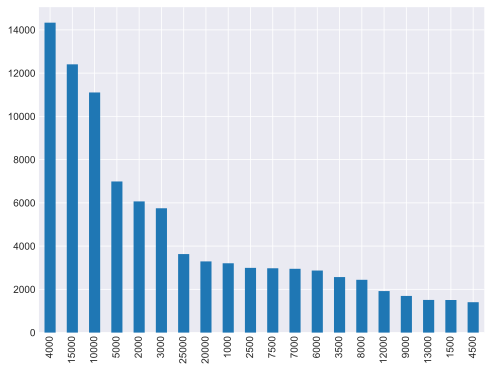

In [69]:
df['LoanOriginalAmount'].value_counts().head(20).plot(kind = 'bar', color = base_color);

In [ ]:
range_bin = np.arange(1000,df['LoanOriginalAmount'].max() + 1000, 1000)
bins = pd.cut(df['LoanOriginalAmount'], range_bin)

In [107]:
loan_original = pd.value_counts(bins)

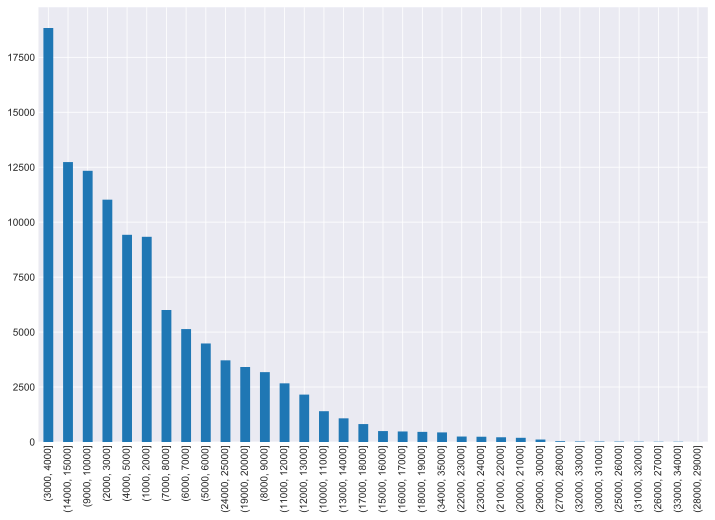

In [108]:
plt.figure(figsize= (12,8))
loan_original.plot(kind = 'bar', color = base_color);


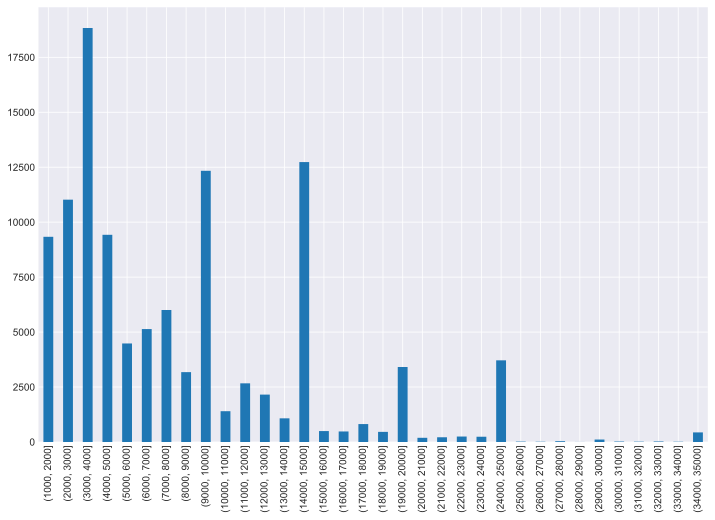

In [109]:
loan_original = pd.value_counts(bins).sort_index()
plt.figure(figsize= (12,8))
loan_original.plot(kind = 'bar', color = base_color);

(400, 900)

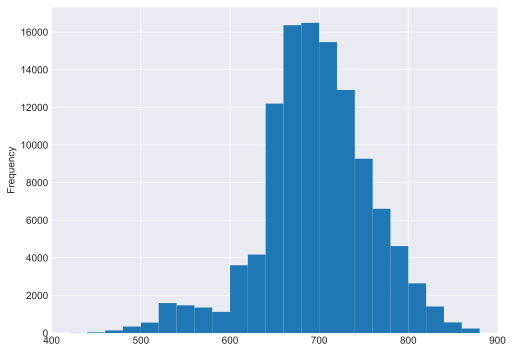

In [118]:
bins = np.arange(400, 900, 20)
df['CreditScoreRangeLower'].plot(kind = 'hist', bins = bins)
plt.xlim((400, 900))

(400, 1000)

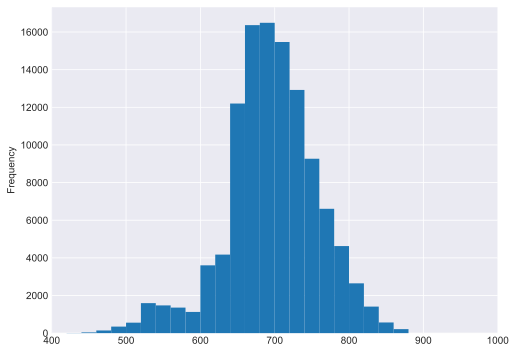

In [121]:
bins = np.arange(400, 900, 20)
df['CreditScoreRangeUpper'].plot(kind = 'hist', bins = bins)
plt.xlim((400, 1000))

In [111]:
df[['CreditScoreRangeLower','CreditScoreRangeUpper', 'FirstRecordedCreditLine',

'CurrentCreditLines', 'RevolvingCreditBalance',  'BankcardUtilization',

'StatedMonthlyIncome', 'TotalProsperLoans', 'OnTimeProsperPayments',

'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment',

'InvestmentFromFriendsCount', 'Investors']].describe()





,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,RevolvingCreditBalance,BankcardUtilization,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,MonthlyLoanPayment,InvestmentFromFriendsCount,Investors
count,113346.000000,113346.000000,106333.000000,1.063330e+05,106333.000000,1.139370e+05,22085.000000,22085.000000,113937.000000,113937.000000,113937.000000
mean,685.567731,704.567731,10.317192,1.759871e+04,0.561309,5.608026e+03,1.421100,22.271949,272.475783,0.023460,80.475228
std,66.458275,66.458275,5.457866,3.293640e+04,0.317918,7.478497e+03,0.764042,18.830425,192.697812,0.232412,103.239020
min,0.000000,19.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,660.000000,679.000000,7.000000,3.121000e+03,0.310000,3.200333e+03,1.000000,9.000000,131.620000,0.000000,2.000000
50%,680.000000,699.000000,10.000000,8.549000e+03,0.600000,4.666667e+03,1.000000,15.000000,217.740000,0.000000,44.000000
75%,720.000000,739.000000,13.000000,1.952100e+04,0.840000,6.825000e+03,2.000000,32.000000,371.580000,0.000000,115.000000
max,880.000000,899.000000,59.000000,1.435667e+06,5.950000,1.750003e+06,8.000000,141.000000,2251.510000,33.000000,1189.000000


(0, 1200)

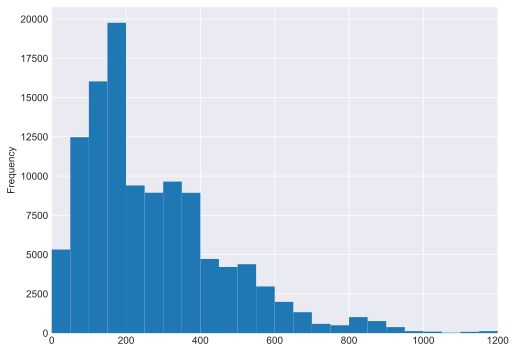

In [132]:
bins = np.arange(0, 1300, 50)
df['MonthlyLoanPayment'].plot(kind = 'hist', bins = bins)
plt.xlim((0,1200))


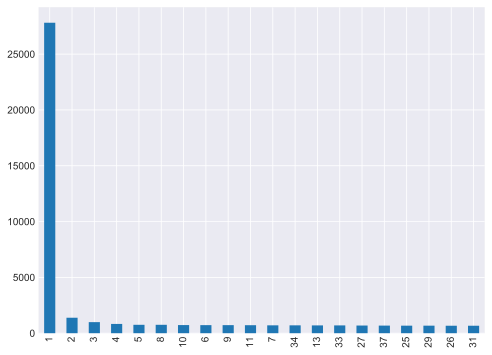

In [135]:
df['Investors'].value_counts().head(20).plot(kind = 'bar', color = base_color)

In [136]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

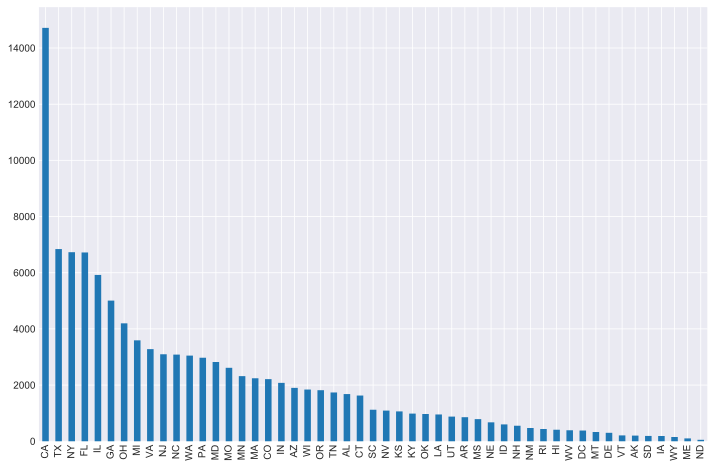

In [138]:
plt.figure(figsize=(12,8))
df['BorrowerState'].value_counts().plot(kind = 'bar', color = base_color);


(0, 1)

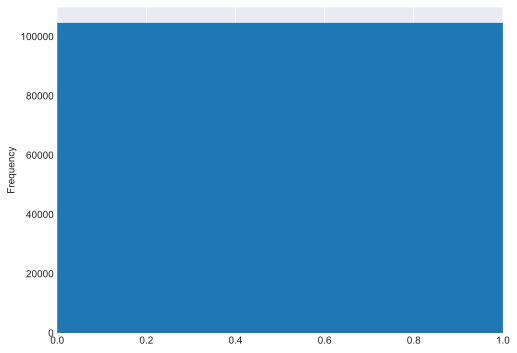

In [142]:
df['DebtToIncomeRatio'].plot(kind = 'hist')
plt.xlim((0,1))

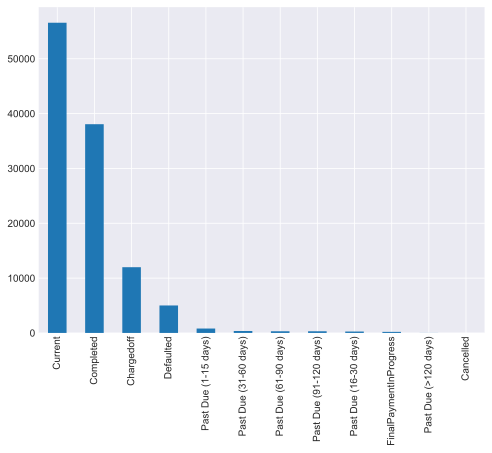

In [144]:
df['LoanStatus'].value_counts().plot(kind = 'bar', color = base_color)